IMPORTAR DATOS

In [11]:
# 1. Carga de librerías y datos
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# URLs de las bases de datos
urls = {
    "Tienda 1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "Tienda 2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "Tienda 3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "Tienda 4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
}

# Diccionario con los dataframes
df_tiendas = {nombre: pd.read_csv(url) for nombre, url in urls.items()}

# Vista previa de una tienda
df_tiendas["Tienda 1"].head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


1. Facturación total por tienda

Facturación total de Tienda 1: $1,150,880,400
Facturación total de Tienda 2: $1,116,343,500
Facturación total de Tienda 3: $1,098,019,600
Facturación total de Tienda 4: $1,038,375,700


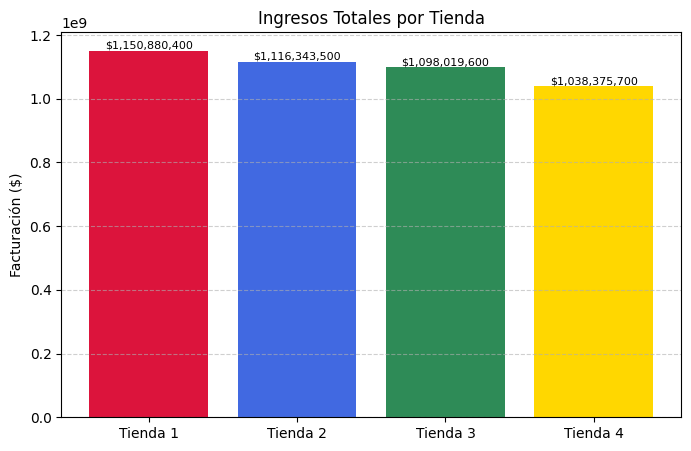

In [12]:
# Calcular sumas
facturacion = {tienda: datos["Precio"].sum() for tienda, datos in df_tiendas.items()}

# Mostrar resultados
for t, v in facturacion.items():
    print(f"Facturación total de {t}: ${v:,.0f}")

# Gráfico de barras
plt.figure(figsize=(8,5))
plt.bar(facturacion.keys(), facturacion.values(), color=["crimson","royalblue","seagreen","gold"])
plt.title("Ingresos Totales por Tienda")
plt.ylabel("Facturación ($)")
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Etiquetas sobre las barras
for i, (t, v) in enumerate(facturacion.items()):
    plt.text(i, v, f"${v:,.0f}", ha="center", va="bottom", fontsize=8)

plt.show()


2. Ventas por categoría


Ventas por Categoría - Tienda 1
Categoría del Producto
Electrónicos               429493500.0
Electrodomésticos          363685200.0
Muebles                    187633700.0
Instrumentos musicales      91299000.0
Deportes y diversión        39290000.0
Juguetes                    17995700.0
Artículos para el hogar     12698400.0
Libros                       8784900.0
Name: Precio, dtype: float64


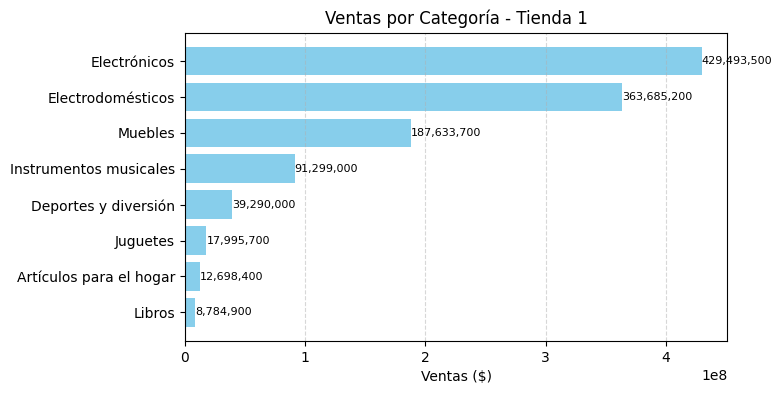


Ventas por Categoría - Tienda 2
Categoría del Producto
Electrónicos               410831100.0
Electrodomésticos          348567800.0
Muebles                    176426300.0
Instrumentos musicales     104990300.0
Deportes y diversión        34744500.0
Juguetes                    15945400.0
Artículos para el hogar     14746900.0
Libros                      10091200.0
Name: Precio, dtype: float64


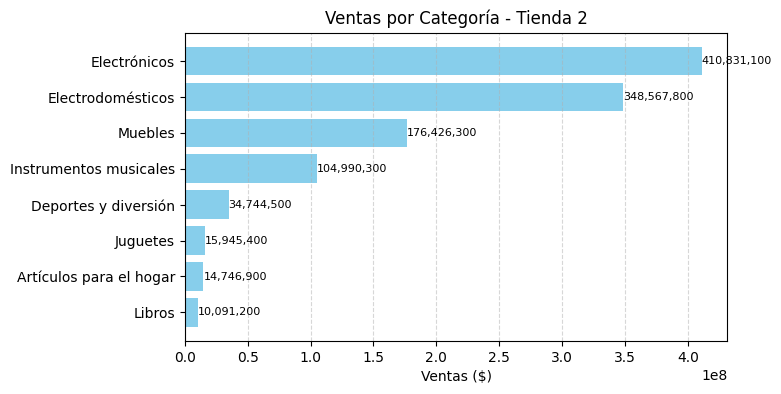


Ventas por Categoría - Tienda 3
Categoría del Producto
Electrónicos               410775800.0
Electrodomésticos          329237900.0
Muebles                    201072100.0
Instrumentos musicales      77380900.0
Deportes y diversión        35593100.0
Juguetes                    19401100.0
Artículos para el hogar     15060000.0
Libros                       9498700.0
Name: Precio, dtype: float64


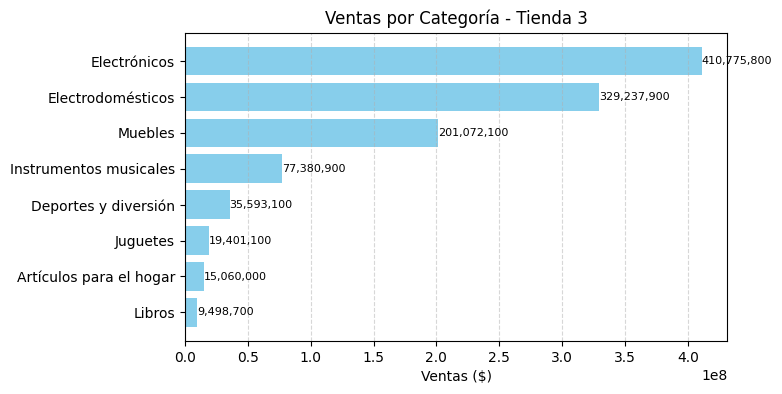


Ventas por Categoría - Tienda 4
Categoría del Producto
Electrónicos               409476100.0
Electrodomésticos          283260200.0
Muebles                    192528900.0
Instrumentos musicales      75102400.0
Deportes y diversión        33350100.0
Juguetes                    20262200.0
Artículos para el hogar     15074500.0
Libros                       9321300.0
Name: Precio, dtype: float64


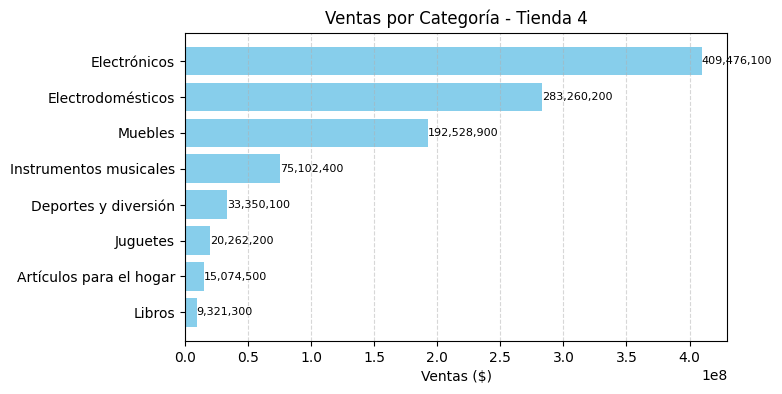

In [13]:
for nombre, datos in df_tiendas.items():
    categorias = datos.groupby("Categoría del Producto")["Precio"].sum().sort_values(ascending=True)

    print(f"\nVentas por Categoría - {nombre}")
    print(categorias.sort_values(ascending=False))

    # gráfico horizontal
    plt.figure(figsize=(7,4))
    plt.barh(categorias.index, categorias.values, color="skyblue")
    plt.title(f"Ventas por Categoría - {nombre}")
    plt.xlabel("Ventas ($)")
    plt.grid(axis="x", linestyle="--", alpha=0.5)

    # etiquetas
    for x,y in zip(categorias.values, categorias.index):
        plt.text(x, y, f"{x:,.0f}", va="center", fontsize=8)

    plt.show()


3. Calificación promedio por tienda

Calificación promedio Tienda 1: 3.98
Calificación promedio Tienda 2: 4.04
Calificación promedio Tienda 3: 4.05
Calificación promedio Tienda 4: 4.00


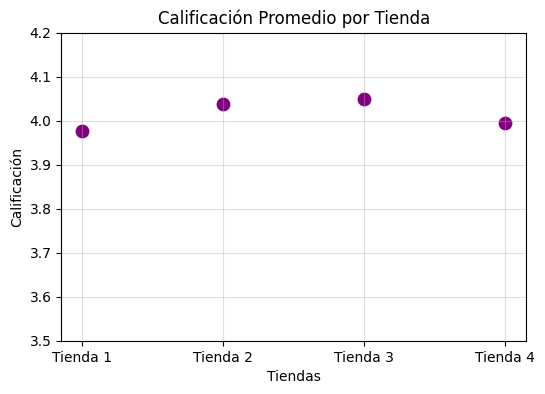

In [14]:
promedios = {t: df["Calificación"].mean() for t, df in df_tiendas.items()}

for t, p in promedios.items():
    print(f"Calificación promedio {t}: {p:.2f}")

# gráfico de puntos
plt.figure(figsize=(6,4))
plt.scatter(promedios.keys(), promedios.values(), color="purple", s=80)
plt.title("Calificación Promedio por Tienda")
plt.xlabel("Tiendas")
plt.ylabel("Calificación")
plt.ylim(3.5, 4.2)
plt.grid(alpha=0.4)
plt.show()


4. Productos más y menos vendidos


Top 5 productos más vendidos - Tienda 1
Producto
Microondas          60
TV LED UHD 4K       60
Armario             60
Secadora de ropa    58
Mesa de noche       56
Name: count, dtype: int64

Bottom 5 productos menos vendidos - Tienda 1
Producto
Ciencia de datos con Python    39
Pandereta                      36
Olla de presión                35
Auriculares con micrófono      33
Celular ABXY                   33
Name: count, dtype: int64


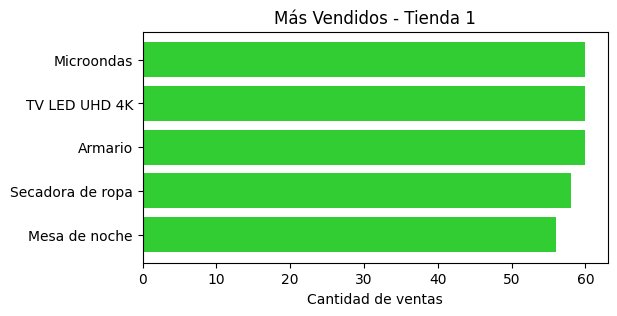

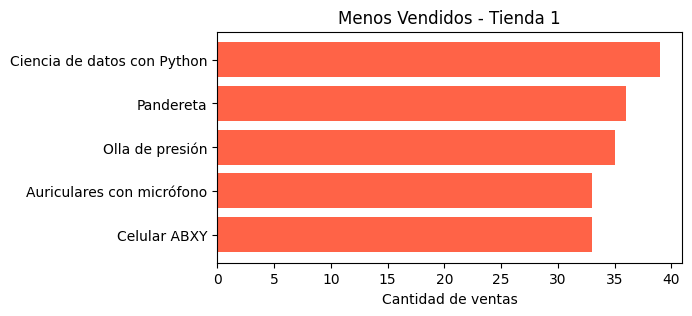


Top 5 productos más vendidos - Tienda 2
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Guitarra acústica            58
Pandereta                    58
Name: count, dtype: int64

Bottom 5 productos menos vendidos - Tienda 2
Producto
Auriculares        37
Sillón             35
Mesa de comedor    34
Impresora          34
Juego de mesa      32
Name: count, dtype: int64


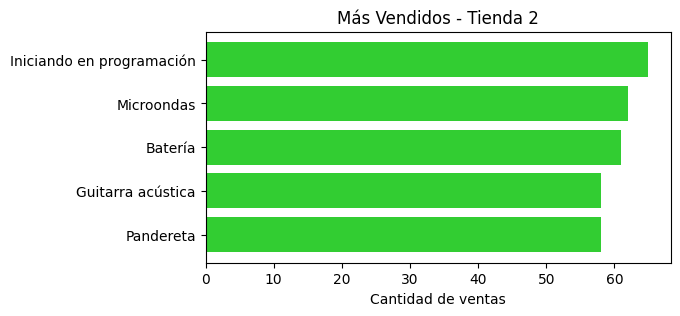

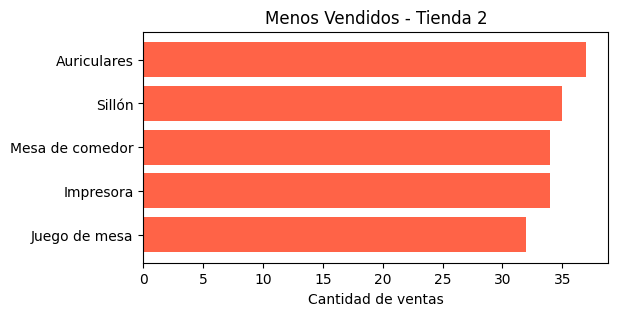


Top 5 productos más vendidos - Tienda 3
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set de ollas       55
Mesa de noche      55
Name: count, dtype: int64

Bottom 5 productos menos vendidos - Tienda 3
Producto
Guitarra eléctrica         38
Set de vasos               36
Mochila                    36
Microondas                 36
Bloques de construcción    35
Name: count, dtype: int64


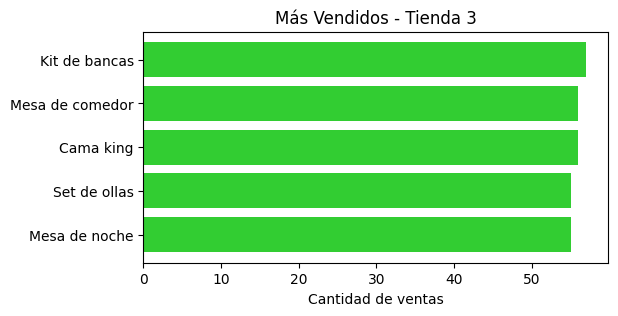

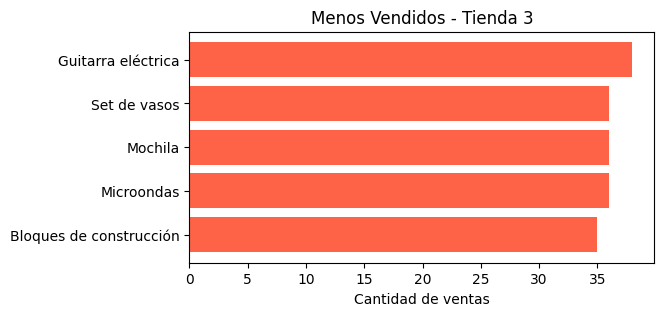


Top 5 productos más vendidos - Tienda 4
Producto
Cama box                     62
Cubertería                   59
Dashboards con Power BI      56
Cama king                    56
Carrito de control remoto    55
Name: count, dtype: int64

Bottom 5 productos menos vendidos - Tienda 4
Producto
Refrigerador                   38
Ciencia de datos con Python    38
Guitarra acústica              37
Armario                        34
Guitarra eléctrica             33
Name: count, dtype: int64


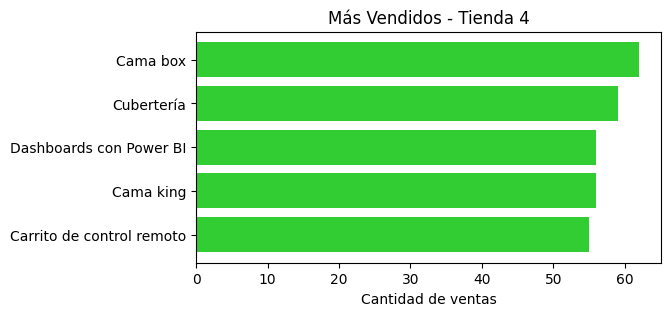

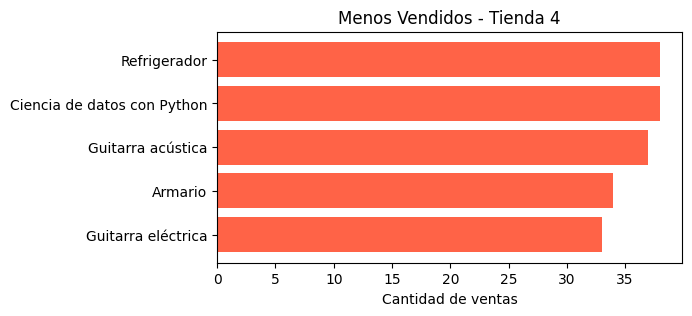

In [15]:
for nombre, datos in df_tiendas.items():
    top = datos["Producto"].value_counts().head(5)
    bottom = datos["Producto"].value_counts().tail(5)

    print(f"\nTop 5 productos más vendidos - {nombre}")
    print(top)
    print(f"\nBottom 5 productos menos vendidos - {nombre}")
    print(bottom)

    # Gráfico más vendidos
    plt.figure(figsize=(6,3))
    plt.barh(top.index, top.values, color="limegreen")
    plt.title(f"Más Vendidos - {nombre}")
    plt.xlabel("Cantidad de ventas")
    plt.gca().invert_yaxis()
    plt.show()

    # Gráfico menos vendidos
    plt.figure(figsize=(6,3))
    plt.barh(bottom.index, bottom.values, color="tomato")
    plt.title(f"Menos Vendidos - {nombre}")
    plt.xlabel("Cantidad de ventas")
    plt.gca().invert_yaxis()
    plt.show()


5. Costo de envío promedio

Costo promedio de envío en Tienda 1: $26,018.61
Costo promedio de envío en Tienda 2: $25,216.24
Costo promedio de envío en Tienda 3: $24,805.68
Costo promedio de envío en Tienda 4: $23,459.46


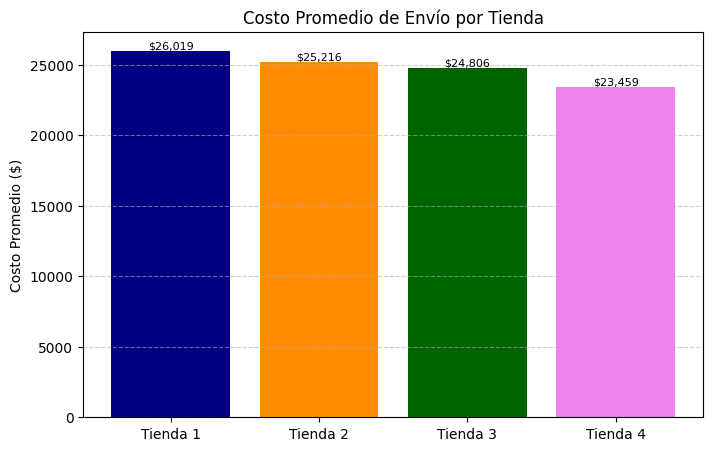

In [16]:
costos_envio = {t: df["Costo de envío"].mean() for t, df in df_tiendas.items()}

for t, c in costos_envio.items():
    print(f"Costo promedio de envío en {t}: ${c:,.2f}")

plt.figure(figsize=(8,5))
plt.bar(costos_envio.keys(), costos_envio.values(), color=["navy","darkorange","darkgreen","violet"])
plt.title("Costo Promedio de Envío por Tienda")
plt.ylabel("Costo Promedio ($)")
plt.grid(axis="y", linestyle="--", alpha=0.6)

for i,(t,v) in enumerate(costos_envio.items()):
    plt.text(i, v, f"${v:,.0f}", ha="center", va="bottom", fontsize=8)

plt.show()


**RECOMENDACIÓN:**
De acuerdo con los resultados, la Tienda 4 presenta la facturación más baja, aun considerando que su costo de envío es ligeramente menor.
Por lo tanto, sería la candidata más razonable para ser vendida.